<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Андрей, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit,  train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor



import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0]).resample('1H').sum()

<div class="alert alert-info">
Исправил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Cнова привет. Спасибо за заметное оформление твоих комментариев. По исправлениям отлично.
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Импорты и загрузку датасета правильнее делать в разных ячейках. Это удобно, если нужно будет догагрузить какую-то функцию, не придется перезапускать весь проект.
       
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Описание задачи есть, библиотеки загружены. Данные получены верно, даты обработаны, мы их переместили в индекс. Ресемплирование провели верно. Отлично, что используем суммирование. Такой вариант интуитивно понятен и удобен, ну и соответствует нашему заданию. Полет нормальный :)
</div>
 

Подключили необходимые библиотеки и загрузили данные. Сразу сделали ресемплирование по часу с суммированием.

## Анализ

In [3]:
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [4]:
df.index.is_monotonic

True

Данные отсортированы

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


У нас есть данные за шесть месяцев, с марта по август 2018 года включительно, пропусков нет, тип данных подходящий

In [6]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Text(0.5, 1.0, 'Скользящее среднее за 24 часа')

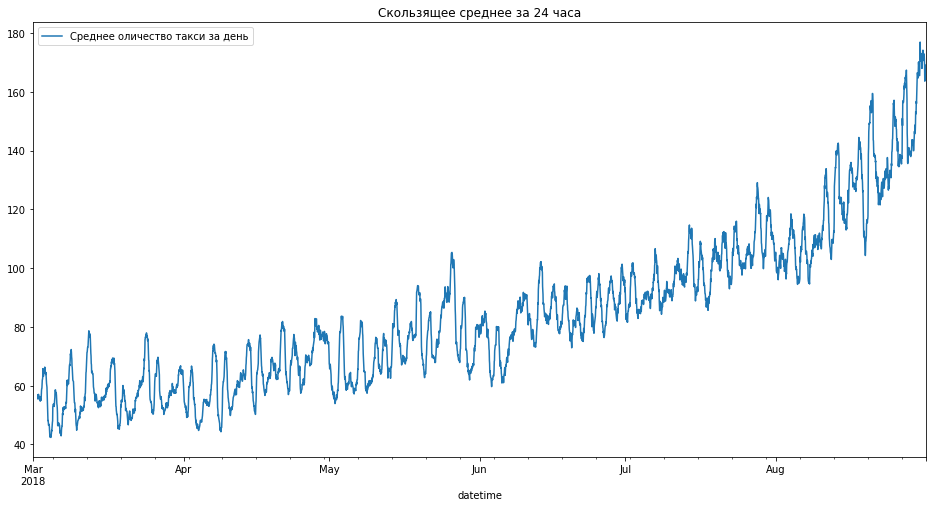

In [7]:
df['num_orders'].rolling(24).mean().plot(figsize=(16, 8))
plt.legend(['Среднее оличество такси за день'])
plt.title('Скользящее среднее за 24 часа')

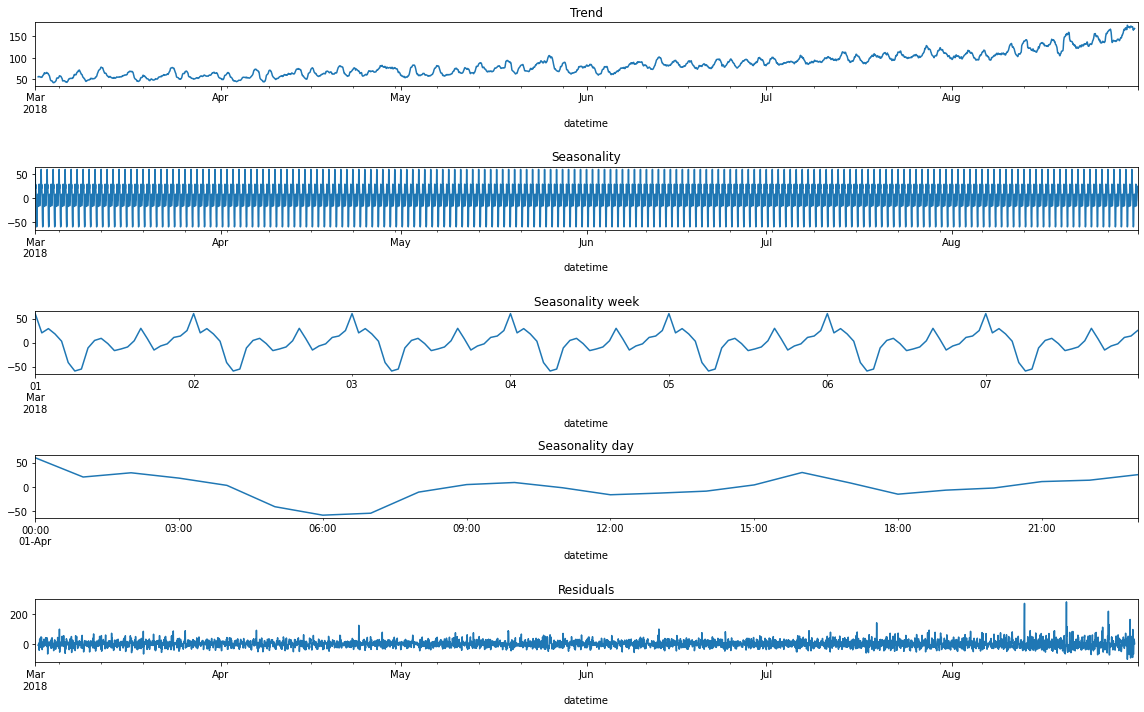

In [8]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(16, 10))
plt.subplot(511)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(512)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(513)
decomposed.seasonal['2018-03-01':'2018-03-7'].plot(ax=plt.gca())
plt.title('Seasonality week')
plt.subplot(514)
decomposed.seasonal['2018-04-01 00:00:00':'2018-04-1 23:00:00'].plot(ax=plt.gca())
plt.title('Seasonality day')
plt.subplot(515)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Рекомендую несколько увеличить графики в проекте, чтобы рассмотрел их даже заказчик. Лучше всего, если все графики будут примерно одного удобного размера.
       
</div> 

Мы видим возрастающий тренд и ежедневную сезонность. В 6 часов утра просиходит спад заказов, вечером он плавно возрастает и в 12 часов ночи пик заказов такси.

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Важно также изучить недельную сезонность. Удобнее это сделать, если ресемплируем данные по дням (только важно это сделать в отдельную переменную, чтобы не потерять основное ресемплирование по часу).
       
</div>



## Обучение

In [9]:
def make_features(df, max_lag, rolling_mean_size):
    df['dayofweek'] = df.index.dayofweek
    df['is_weekend'] = df.index.dayofweek.isin([5,6])*1
    df['hours'] = df.index.hour
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df.iloc[:,0].shift(lag)

    df['rolling_mean'] = df.iloc[:,0].shift().rolling(rolling_mean_size).mean()  

In [10]:
make_features(df, 24, 12)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-02 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4392 non-null   int64  
 1   dayofweek     4392 non-null   int64  
 2   is_weekend    4392 non-null   int64  
 3   hours         4392 non-null   int64  
 4   lag_1         4392 non-null   float64
 5   lag_2         4392 non-null   float64
 6   lag_3         4392 non-null   float64
 7   lag_4         4392 non-null   float64
 8   lag_5         4392 non-null   float64
 9   lag_6         4392 non-null   float64
 10  lag_7         4392 non-null   float64
 11  lag_8         4392 non-null   float64
 12  lag_9         4392 non-null   float64
 13  lag_10        4392 non-null   float64
 14  lag_11        4392 non-null   float64
 15  lag_12        4392 non-null   float64
 16  lag_13        4392 non-null   float64
 17  lag_14        4392 non-null

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div> 

In [11]:
cat_column = ['hours', 'dayofweek', 'is_weekend'] # категориальные данные

In [12]:
train,test = train_test_split(df, test_size=0.1, shuffle=False)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно, ничего не перемешиваем.
</div>


In [13]:
def features_target_split(df,target):
    features = df.drop(target, axis=1)
    target = df[target]
    return features, target

In [14]:
features_test, target_test = features_target_split(test,'num_orders')
features_train, target_train = features_target_split(train,'num_orders')

Разделили выборку на тестовую и обучающую и отделили целевой признак

In [15]:
scaler = StandardScaler()
scaler.fit(features_train.iloc[:, 3:])
features_train.iloc[:, 3:] = scaler.transform(features_train.iloc[:, 3:])
features_test.iloc[:, 3:] = scaler.transform(features_test.iloc[:, 3:])


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В нашей задаче масштабирование необязательно: количество заказов у нас обычно доходит не больше 300 в час, остальные метрики производные от этой (лаги, среднее), часы, минуты у нас также в масштабе до нескольких десятков.
       
</div>


Стандартезировал данные

In [16]:
models_scors = pd.DataFrame(columns = ['model', 'rmse'])

**LinearRegression**

In [17]:
%%time
cv = TimeSeriesSplit(n_splits=3).split(features_train)
model_lr = LinearRegression() 
model_lr.fit(features_train, target_train)
score_lr = cross_val_score(model_lr, features_train, target_train, scoring='neg_mean_squared_error', cv=cv)
round(np.mean(-score_lr)**0.5, 2)
models_scors = models_scors.append({'model' : 'LinearRegression',
                     'rmse' : round(np.mean(-score_lr)**0.5, 2)}, ignore_index=True)

CPU times: user 167 ms, sys: 555 ms, total: 722 ms
Wall time: 710 ms



<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
На этапе исследования моделей тестовую выборку трогать не стоит. Если выделяем две выборки, то рекомендую здесь также использовать кросс-валидацию для определения качества модели.
    
Например, так:
    
```
%%time
#модель линейной регрессии
cv = TimeSeriesSplit(n_splits=3).split(features_train)
model_lr = LinearRegression() 
model_lr.fit(features_train, target_train)
score_lr = cross_val_score(model_lr, features_train, target_train, scoring='neg_mean_squared_error', cv=cv)
round(np.mean(-score_lr)**0.5, 2)
```

</div>


<div class="alert alert-info">
Исправил.
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Tолько нужно было бы вывести качество получившееся.
    
models_scors
       
</div>

**LGBMR_model**

In [18]:
%%time
LGBMR_model = LGBMRegressor(random_state=42, loss_function='RMSE', cat_features=cat_column)

parameters = [{'max_depth': [5],
               'learning_rate': [0.07],
               'n_estimators': [190],
               'verbose' : [3]}]

LGBMR_model_gscvts = GridSearchCV(LGBMR_model, param_grid=parameters, scoring='neg_mean_squared_error', 
                   cv=TimeSeriesSplit(n_splits=5), verbose=True)
LGBMR_model_gscvts.fit(features_train, target_train)

models_scors = models_scors.append({'model' : 'LGBMRegressor',
                     'rmse' : abs(LGBMR_model_gscvts.best_score_) ** 0.5}, ignore_index=True)

LGBMR_model_gscvts.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.032046
[LightGBM] [Debug] init for col-wise cost 0.007878 seconds, init for row-wise cost 0.004352 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 662, number of used features: 28


{'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 190, 'verbose': 3}

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно  
</div>  

**CatBoostRegressor**

In [19]:
%%time
CBR_model = CatBoostRegressor(random_state=42, loss_function='RMSE', cat_features=cat_column, silent=True)

parameters = [{'max_depth': [6],
               'learning_rate': [0.1],
               'n_estimators': [360]}]

CBR_model_gscvts = GridSearchCV(CBR_model, param_grid=parameters, scoring='neg_mean_squared_error', 
                   cv=TimeSeriesSplit(n_splits=5), verbose=True, n_jobs=-1)
CBR_model_gscvts.fit(features_train, target_train)

models_scors = models_scors.append({'model' : 'CatBoostRegressor',
                     'rmse' : abs(CBR_model_gscvts.best_score_) ** 0.5}, ignore_index=True)

CBR_model_gscvts.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 13.9 s, sys: 457 ms, total: 14.4 s
Wall time: 20 s


{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 360}

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь по коду также все отлично.
</div>  

**DummyRegressor**

In [20]:
%%time
dummy_model = DummyRegressor(strategy='mean')

dummy_model.fit(features_train, target_train)
pred = dummy_model.predict(features_test)

models_scors = models_scors.append({'model' : 'DummyRegressor',
                     'rmse' : mean_squared_error(pred, target_test) ** 0.5}, ignore_index=True)

CPU times: user 4.96 ms, sys: 18 µs, total: 4.98 ms
Wall time: 4.09 ms


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также можно было бы добавить проверку модели на адекватность. В случае с временными рядами модель будет предсказывать следующее значение предыдущим:


`pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]`

</div>


In [21]:
models_scors

,model,rmse
0,LinearRegression,27.870000
1,LGBMRegressor,24.891486
2,CatBoostRegressor,23.903775
3,DummyRegressor,84.687683


По результатам, лучше всего себя проявила модель CatBoostRegressor. Её и будем тестировать.

## Тестирование

In [22]:
%%time
predict_test = CBR_model_gscvts.best_estimator_.predict(features_test)
print('rmse : {}'.format(mean_squared_error(predict_test, target_test) ** 0.5))

rmse : 38.41252235119912
CPU times: user 4.06 ms, sys: 0 ns, total: 4.06 ms
Wall time: 3.62 ms


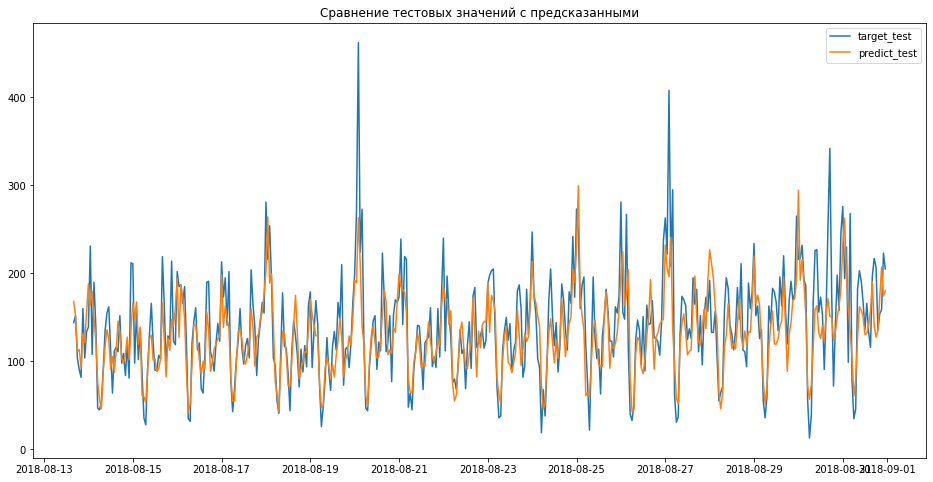

In [23]:
plt.figure(figsize=(16, 8))

plt.plot(target_test, label='target_test')
plt.plot(target_test.index, predict_test, label='predict_test')

plt.title('Сравнение тестовых значений с предсказанными')
plt.legend()
plt.show()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь можно прокомментировать, в какие моменты модель чаще ошибается.
       
</div> 
  


<div class="alert alert-info">
По полученным данным можно однозначно сказать, что модель ошибается чаще в моменты резких скачков заказов такси, которые могут быть спровоцированы единичными внешними факторами в виде каких либо праздников, либо каких либо форс мажорныж обстоятельств по местности работы агрегатора. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 В целом да. Да вообще модели учатся на обобщениях и усреднениях, а любое усреднение сглаживает пиковые значения. Эта проблема у нас будет почти всегда. Но надо признать, модель хорошо детектирует сам факт аномального спроса, что и нужно заказчику.
</div>
 


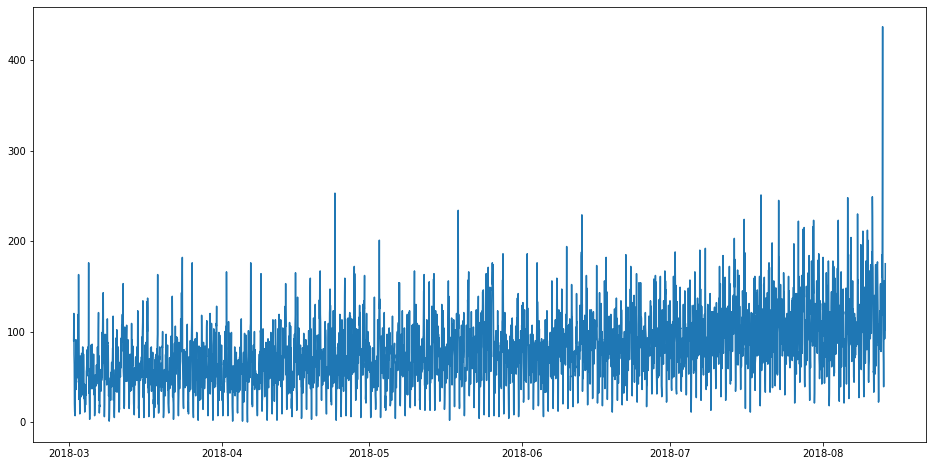

In [24]:
plt.figure(figsize=(16, 8))

plt.plot(target_train, label='target_train')

Наша модель отвечает заданным критериям. Задал лаг в 24 часа, хотя лаг в две недели показывает лучшие результаты.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

С этого момента поподробнее :) Если лаг в две недели показывает лучшие результаты, почему не звзяли первые 24 лага?
    
***
    
    
 Мы выше делали исследование и увидели, что у нас есть дневная и (если судить по тому, что подали признак дня недели) недельная сезонность. Соответственно, из лагов нам пригодится лаг предыдущего часа, того же и предыдущего часа предыдущего дня, недельной давности. Выбирать отдельно важные лаги не стоит - модель подберет веса и сделает это за нас, главное − подать достаточно этих самых лагов.
    
Значимость лагов можно посмотреть по автокорреляции. Функция показывает, как признак коррелирует с предыдущими. Область синей заливки обозначает порог статистической значимости (если значение внутри, корреляция уже не заслуживает доверия. Статзначимость вычисляется по тесту Стьюдента).
    
Если запустишь код ниже, увидишь, что у нас есть важные лаги 24, 48, 168. Можно подать все 168 лагов подряд, тогда скорость обучения будет низкой, но качество высоким. Можно дать первые 24 лага - простое решение и проходит по качеству, а можно взять, например, первые 12 лагов, а затем отдельно 24, 48 ,168. Тогда и скорость, и качество будут высокими.

       
</div> 
  


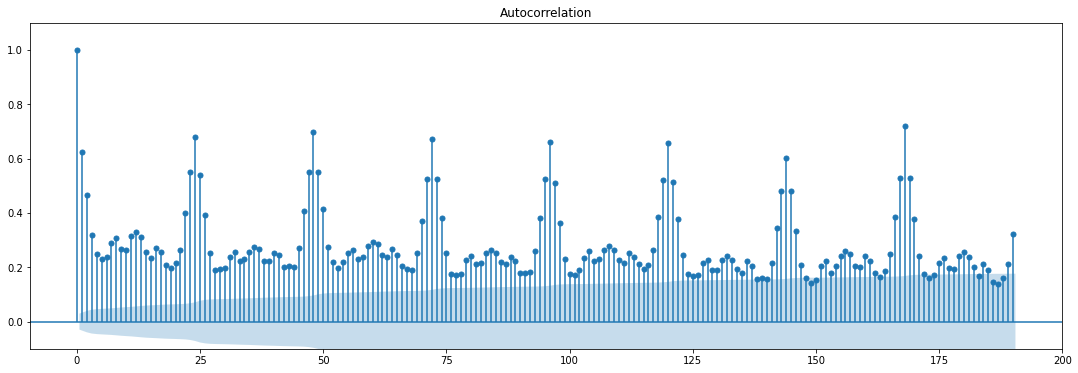

In [25]:

# Код ревьюера
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проверке**

У тебя получился хороший проект. Неплохой выбор моделей для обучения, достаточно подробная исследовательская часть. Отличная реализация кросс-валидации. Грамотное создание фичей. Однако есть и что доработать:
    
* Важно в части исследования моделей во всех случаях реализовать кросс-валидацию, чтобы корректно сравнивать качество моделей (подобное с подобным).

Рекомендую не останавливаться на комментарии в конце, что если подать больше лагов, качество будет выше. Стоит вернуться и подать больше лагов! Вообще, в задаче временных рядов подбор и моделей, и гиперпараметров не так сильно важен, как подбор фичей. На эту тему можно посмотреть лекцию  https://www.youtube.com/watch?v=RdTxLXmbvjY  
    
Думаю, если грамотно подойти к лагам, то вполне возможно лучшей моделью окажется линейная регрессия. И по качеству, и по времени исполнения.


**Желаю удачи и жду твой проект на повторное ревью!**😉

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48